In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape(((72*3+1)*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape(((72*3+1)*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(911, 100, 100)


In [17]:
print(y_test.shape)

(391, 100, 100)


In [18]:
print(x_train.shape)

(911, 15, 1)


In [19]:
print(x_test.shape)

(391, 15, 1)


In [20]:
theta_train.shape

(911,)

In [21]:
tsr_train.shape

(911,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [24]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((911, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((391, 2, 1))

In [28]:
tsr_theta_train.shape

(911, 2, 1)

In [29]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
23/23 [==============================] - 1s 6ms/step - loss: 0.0106 - rmse: 0.1023
Epoch 2/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0919
Epoch 3/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0844
Epoch 4/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0838
Epoch 5/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 6/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 7/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 8/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 9/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 10/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 11/10000
23/23 [=======

23/23 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0765
Epoch 85/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0764
Epoch 86/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 87/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 88/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0762
Epoch 89/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 90/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0759
Epoch 91/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0758
Epoch 92/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0757
Epoch 93/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 94/10000
23/23 [=============

23/23 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 168/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 169/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 170/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 171/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 172/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 173/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 174/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0618
Epoch 175/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 176/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 177/10000
23/23 [===

23/23 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 250/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 251/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 252/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 253/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 254/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0546
Epoch 255/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0545
Epoch 256/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0544
Epoch 257/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0544
Epoch 258/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0543
Epoch 259/10000
23/23 [===

23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 332/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 333/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 334/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0489
Epoch 335/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 336/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0488
Epoch 337/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0487
Epoch 338/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0487
Epoch 339/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 340/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0485
Epoch 341/10000
23/23 [===

23/23 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 414/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0441
Epoch 415/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 416/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 417/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 418/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0442
Epoch 419/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 420/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 421/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 422/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 423/10000
23/23 [===

23/23 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 496/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 497/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 498/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 499/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 500/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 501/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 502/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0400
Epoch 503/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 504/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 505/10000
23/23 [===

23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 578/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 579/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 580/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 581/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 582/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 583/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 584/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 585/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 586/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 587/10000
23/23 [===

23/23 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 660/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 661/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 662/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 663/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 664/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 665/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 666/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 667/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 668/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 669/10000
23/23 [===

23/23 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 742/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 743/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 744/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0305
Epoch 745/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 746/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 747/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0303
Epoch 748/10000
23/23 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 749/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0304
Epoch 750/10000
23/23 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0305
Epoch 751/10000
23/23 [===

23/23 [==============================] - 0s 6ms/step - loss: 9.4507e-04 - rmse: 0.0286
Epoch 823/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.3107e-04 - rmse: 0.0284
Epoch 824/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.1258e-04 - rmse: 0.0280
Epoch 825/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.4650e-04 - rmse: 0.0286
Epoch 826/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2370e-04 - rmse: 0.0282
Epoch 827/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.2490e-04 - rmse: 0.0283
Epoch 828/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.1763e-04 - rmse: 0.0281
Epoch 829/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.4157e-04 - rmse: 0.0286
Epoch 830/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.2056e-04 - rmse: 0.0282
Epoch 831/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.1230e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 8.2914e-04 - rmse: 0.0265
Epoch 902/10000
23/23 [==============================] - 0s 6ms/step - loss: 8.1943e-04 - rmse: 0.0263
Epoch 903/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1854e-04 - rmse: 0.0263
Epoch 904/10000
23/23 [==============================] - 0s 6ms/step - loss: 8.1573e-04 - rmse: 0.0262
Epoch 905/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.1046e-04 - rmse: 0.0261
Epoch 906/10000
23/23 [==============================] - 0s 6ms/step - loss: 8.1875e-04 - rmse: 0.0263
Epoch 907/10000
23/23 [==============================] - 0s 6ms/step - loss: 8.1239e-04 - rmse: 0.0262
Epoch 908/10000
23/23 [==============================] - 0s 5ms/step - loss: 8.0791e-04 - rmse: 0.0261
Epoch 909/10000
23/23 [==============================] - 0s 6ms/step - loss: 8.1932e-04 - rmse: 0.0263
Epoch 910/10000
23/23 [==============================] - 0s 6ms/step - loss: 8.0201e-04 -

23/23 [==============================] - 0s 5ms/step - loss: 7.5755e-04 - rmse: 0.0251
Epoch 981/10000
23/23 [==============================] - 0s 6ms/step - loss: 7.4722e-04 - rmse: 0.0249
Epoch 982/10000
23/23 [==============================] - 0s 6ms/step - loss: 7.4282e-04 - rmse: 0.0248
Epoch 983/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.5411e-04 - rmse: 0.0250
Epoch 984/10000
23/23 [==============================] - 0s 6ms/step - loss: 7.3730e-04 - rmse: 0.0247
Epoch 985/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.4086e-04 - rmse: 0.0247
Epoch 986/10000
23/23 [==============================] - 0s 6ms/step - loss: 7.5818e-04 - rmse: 0.0251
Epoch 987/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.5329e-04 - rmse: 0.0250
Epoch 988/10000
23/23 [==============================] - 0s 6ms/step - loss: 7.3858e-04 - rmse: 0.0247
Epoch 989/10000
23/23 [==============================] - 0s 5ms/step - loss: 7.3565e-04 -

23/23 [==============================] - 0s 6ms/step - loss: 6.8453e-04 - rmse: 0.0236
Epoch 1060/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.7920e-04 - rmse: 0.0235
Epoch 1061/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.7734e-04 - rmse: 0.0234
Epoch 1062/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.8129e-04 - rmse: 0.0235
Epoch 1063/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.6814e-04 - rmse: 0.0232
Epoch 1064/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.6560e-04 - rmse: 0.0232
Epoch 1065/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.7594e-04 - rmse: 0.0234
Epoch 1066/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.6108e-04 - rmse: 0.0231
Epoch 1067/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.6365e-04 - rmse: 0.0231
Epoch 1068/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.6

23/23 [==============================] - 0s 5ms/step - loss: 6.2589e-04 - rmse: 0.0223
Epoch 1138/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.3654e-04 - rmse: 0.0225
Epoch 1139/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.1978e-04 - rmse: 0.0221
Epoch 1140/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.3010e-04 - rmse: 0.0224
Epoch 1141/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.1943e-04 - rmse: 0.0221
Epoch 1142/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0880e-04 - rmse: 0.0219
Epoch 1143/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.0947e-04 - rmse: 0.0219
Epoch 1144/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.0820e-04 - rmse: 0.0219
Epoch 1145/10000
23/23 [==============================] - 0s 5ms/step - loss: 6.1717e-04 - rmse: 0.0221
Epoch 1146/10000
23/23 [==============================] - 0s 6ms/step - loss: 6.1

23/23 [==============================] - 0s 5ms/step - loss: 5.5484e-04 - rmse: 0.0206
Epoch 1216/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.4840e-04 - rmse: 0.0205
Epoch 1217/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5460e-04 - rmse: 0.0206
Epoch 1218/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.7181e-04 - rmse: 0.0210
Epoch 1219/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.8326e-04 - rmse: 0.0213
Epoch 1220/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7253e-04 - rmse: 0.0210
Epoch 1221/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.7914e-04 - rmse: 0.0212
Epoch 1222/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.9892e-04 - rmse: 0.0217
Epoch 1223/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.6652e-04 - rmse: 0.0209
Epoch 1224/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.5

23/23 [==============================] - 0s 6ms/step - loss: 5.3743e-04 - rmse: 0.0202
Epoch 1294/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.2724e-04 - rmse: 0.0199
Epoch 1295/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.2522e-04 - rmse: 0.0199
Epoch 1296/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.2691e-04 - rmse: 0.0199
Epoch 1297/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.1786e-04 - rmse: 0.0197
Epoch 1298/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.1784e-04 - rmse: 0.0197
Epoch 1299/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.1723e-04 - rmse: 0.0197
Epoch 1300/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.2060e-04 - rmse: 0.0198
Epoch 1301/10000
23/23 [==============================] - 0s 6ms/step - loss: 5.0838e-04 - rmse: 0.0195
Epoch 1302/10000
23/23 [==============================] - 0s 5ms/step - loss: 5.1

23/23 [==============================] - 0s 6ms/step - loss: 4.9611e-04 - rmse: 0.0191
Epoch 1372/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8296e-04 - rmse: 0.0188
Epoch 1373/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8681e-04 - rmse: 0.0189
Epoch 1374/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.9541e-04 - rmse: 0.0191
Epoch 1375/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.8839e-04 - rmse: 0.0189
Epoch 1376/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.9442e-04 - rmse: 0.0191
Epoch 1377/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.8123e-04 - rmse: 0.0187
Epoch 1378/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.8474e-04 - rmse: 0.0188
Epoch 1379/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.8787e-04 - rmse: 0.0189
Epoch 1380/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7

23/23 [==============================] - 0s 6ms/step - loss: 4.7070e-04 - rmse: 0.0185
Epoch 1450/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5743e-04 - rmse: 0.0181
Epoch 1451/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.5763e-04 - rmse: 0.0181
Epoch 1452/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.6690e-04 - rmse: 0.0184
Epoch 1453/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.6508e-04 - rmse: 0.0183
Epoch 1454/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.6235e-04 - rmse: 0.0182
Epoch 1455/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.5436e-04 - rmse: 0.0180
Epoch 1456/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.5883e-04 - rmse: 0.0181
Epoch 1457/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.6312e-04 - rmse: 0.0183
Epoch 1458/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.7

23/23 [==============================] - 0s 5ms/step - loss: 4.3002e-04 - rmse: 0.0173
Epoch 1528/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.1762e-04 - rmse: 0.0170
Epoch 1529/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.2128e-04 - rmse: 0.0171
Epoch 1530/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.3041e-04 - rmse: 0.0174
Epoch 1531/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.3227e-04 - rmse: 0.0174
Epoch 1532/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.2491e-04 - rmse: 0.0172
Epoch 1533/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.2232e-04 - rmse: 0.0171
Epoch 1534/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.2397e-04 - rmse: 0.0172
Epoch 1535/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.4510e-04 - rmse: 0.0178
Epoch 1536/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.3

23/23 [==============================] - 0s 6ms/step - loss: 4.0795e-04 - rmse: 0.0167
Epoch 1606/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9717e-04 - rmse: 0.0164
Epoch 1607/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.0316e-04 - rmse: 0.0166
Epoch 1608/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1042e-04 - rmse: 0.0168
Epoch 1609/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.2125e-04 - rmse: 0.0171
Epoch 1610/10000
23/23 [==============================] - 0s 5ms/step - loss: 4.1156e-04 - rmse: 0.0168
Epoch 1611/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9614e-04 - rmse: 0.0164
Epoch 1612/10000
23/23 [==============================] - 0s 6ms/step - loss: 4.0644e-04 - rmse: 0.0167
Epoch 1613/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9909e-04 - rmse: 0.0164
Epoch 1614/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.9

23/23 [==============================] - 0s 6ms/step - loss: 3.8746e-04 - rmse: 0.0161
Epoch 1684/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7823e-04 - rmse: 0.0158
Epoch 1685/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7234e-04 - rmse: 0.0156
Epoch 1686/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.9301e-04 - rmse: 0.0163
Epoch 1687/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.7784e-04 - rmse: 0.0158
Epoch 1688/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.7268e-04 - rmse: 0.0156
Epoch 1689/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.8384e-04 - rmse: 0.0160
Epoch 1690/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.8386e-04 - rmse: 0.0160
Epoch 1691/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.8296e-04 - rmse: 0.0160
Epoch 1692/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7

23/23 [==============================] - 0s 6ms/step - loss: 3.6074e-04 - rmse: 0.0153
Epoch 1762/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5897e-04 - rmse: 0.0152
Epoch 1763/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5850e-04 - rmse: 0.0152
Epoch 1764/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5958e-04 - rmse: 0.0152
Epoch 1765/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5310e-04 - rmse: 0.0150
Epoch 1766/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5902e-04 - rmse: 0.0152
Epoch 1767/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.7024e-04 - rmse: 0.0156
Epoch 1768/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5729e-04 - rmse: 0.0152
Epoch 1769/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5871e-04 - rmse: 0.0152
Epoch 1770/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.6

23/23 [==============================] - 0s 6ms/step - loss: 3.4952e-04 - rmse: 0.0149
Epoch 1840/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3915e-04 - rmse: 0.0146
Epoch 1841/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.5210e-04 - rmse: 0.0150
Epoch 1842/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4870e-04 - rmse: 0.0149
Epoch 1843/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3964e-04 - rmse: 0.0146
Epoch 1844/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.3726e-04 - rmse: 0.0145
Epoch 1845/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3547e-04 - rmse: 0.0145
Epoch 1846/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4087e-04 - rmse: 0.0146
Epoch 1847/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4460e-04 - rmse: 0.0148
Epoch 1848/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.4

23/23 [==============================] - 0s 6ms/step - loss: 3.3374e-04 - rmse: 0.0144
Epoch 1918/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3530e-04 - rmse: 0.0145
Epoch 1919/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4948e-04 - rmse: 0.0150
Epoch 1920/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.5278e-04 - rmse: 0.0151
Epoch 1921/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4598e-04 - rmse: 0.0148
Epoch 1922/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.4979e-04 - rmse: 0.0150
Epoch 1923/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3433e-04 - rmse: 0.0144
Epoch 1924/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.3652e-04 - rmse: 0.0145
Epoch 1925/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.3811e-04 - rmse: 0.0146
Epoch 1926/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.2

23/23 [==============================] - 0s 5ms/step - loss: 3.1617e-04 - rmse: 0.0138
Epoch 1996/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.2026e-04 - rmse: 0.0140
Epoch 1997/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.1902e-04 - rmse: 0.0139
Epoch 1998/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.2173e-04 - rmse: 0.0140
Epoch 1999/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.1952e-04 - rmse: 0.0139
Epoch 2000/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.2350e-04 - rmse: 0.0141
Epoch 2001/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.3886e-04 - rmse: 0.0146
Epoch 2002/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.1935e-04 - rmse: 0.0139
Epoch 2003/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.2266e-04 - rmse: 0.0141
Epoch 2004/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.2

23/23 [==============================] - 0s 6ms/step - loss: 3.1053e-04 - rmse: 0.0137
Epoch 2074/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.1937e-04 - rmse: 0.0140
Epoch 2075/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.2202e-04 - rmse: 0.0141
Epoch 2076/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0762e-04 - rmse: 0.0135
Epoch 2077/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0916e-04 - rmse: 0.0136
Epoch 2078/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0695e-04 - rmse: 0.0135
Epoch 2079/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.1552e-04 - rmse: 0.0138
Epoch 2080/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0781e-04 - rmse: 0.0136
Epoch 2081/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9727e-04 - rmse: 0.0132
Epoch 2082/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0

23/23 [==============================] - 0s 6ms/step - loss: 2.9826e-04 - rmse: 0.0132
Epoch 2152/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0016e-04 - rmse: 0.0133
Epoch 2153/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.1222e-04 - rmse: 0.0138
Epoch 2154/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0085e-04 - rmse: 0.0133
Epoch 2155/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9645e-04 - rmse: 0.0132
Epoch 2156/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0660e-04 - rmse: 0.0135
Epoch 2157/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.1229e-04 - rmse: 0.0138
Epoch 2158/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9709e-04 - rmse: 0.0132
Epoch 2159/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.8987e-04 - rmse: 0.0129
Epoch 2160/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.9

23/23 [==============================] - 0s 6ms/step - loss: 2.9256e-04 - rmse: 0.0131
Epoch 2230/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8466e-04 - rmse: 0.0127
Epoch 2231/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8999e-04 - rmse: 0.0130
Epoch 2232/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8995e-04 - rmse: 0.0130
Epoch 2233/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8231e-04 - rmse: 0.0127
Epoch 2234/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8684e-04 - rmse: 0.0128
Epoch 2235/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.9326e-04 - rmse: 0.0131
Epoch 2236/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0138e-04 - rmse: 0.0134
Epoch 2237/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.8704e-04 - rmse: 0.0128
Epoch 2238/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7

23/23 [==============================] - 0s 6ms/step - loss: 2.9513e-04 - rmse: 0.0132
Epoch 2308/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.9760e-04 - rmse: 0.0133
Epoch 2309/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0157e-04 - rmse: 0.0134
Epoch 2310/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.9130e-04 - rmse: 0.0130
Epoch 2311/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.9463e-04 - rmse: 0.0132
Epoch 2312/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.9351e-04 - rmse: 0.0131
Epoch 2313/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8103e-04 - rmse: 0.0126
Epoch 2314/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8091e-04 - rmse: 0.0126
Epoch 2315/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.7845e-04 - rmse: 0.0125
Epoch 2316/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.8

23/23 [==============================] - 0s 6ms/step - loss: 2.7459e-04 - rmse: 0.0124
Epoch 2386/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.7599e-04 - rmse: 0.0125
Epoch 2387/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7680e-04 - rmse: 0.0125
Epoch 2388/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7855e-04 - rmse: 0.0126
Epoch 2389/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7796e-04 - rmse: 0.0126
Epoch 2390/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7059e-04 - rmse: 0.0123
Epoch 2391/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6502e-04 - rmse: 0.0120
Epoch 2392/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.7654e-04 - rmse: 0.0125
Epoch 2393/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7702e-04 - rmse: 0.0125
Epoch 2394/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7

23/23 [==============================] - 0s 5ms/step - loss: 2.6589e-04 - rmse: 0.0121
Epoch 2464/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6354e-04 - rmse: 0.0120
Epoch 2465/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6129e-04 - rmse: 0.0119
Epoch 2466/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.5948e-04 - rmse: 0.0118
Epoch 2467/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5882e-04 - rmse: 0.0118
Epoch 2468/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5998e-04 - rmse: 0.0119
Epoch 2469/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6124e-04 - rmse: 0.0119
Epoch 2470/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.6168e-04 - rmse: 0.0119
Epoch 2471/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6823e-04 - rmse: 0.0122
Epoch 2472/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.7

23/23 [==============================] - 0s 6ms/step - loss: 2.6679e-04 - rmse: 0.0122
Epoch 2542/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.6590e-04 - rmse: 0.0122
Epoch 2543/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6911e-04 - rmse: 0.0123
Epoch 2544/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6670e-04 - rmse: 0.0122
Epoch 2545/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6555e-04 - rmse: 0.0121
Epoch 2546/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.8126e-04 - rmse: 0.0128
Epoch 2547/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6887e-04 - rmse: 0.0123
Epoch 2548/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.6792e-04 - rmse: 0.0122
Epoch 2549/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6845e-04 - rmse: 0.0123
Epoch 2550/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6

23/23 [==============================] - 0s 5ms/step - loss: 2.5108e-04 - rmse: 0.0116
Epoch 2620/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5185e-04 - rmse: 0.0116
Epoch 2621/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5383e-04 - rmse: 0.0117
Epoch 2622/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4888e-04 - rmse: 0.0115
Epoch 2623/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.5216e-04 - rmse: 0.0116
Epoch 2624/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4875e-04 - rmse: 0.0115
Epoch 2625/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5303e-04 - rmse: 0.0117
Epoch 2626/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.6660e-04 - rmse: 0.0122
Epoch 2627/10000
23/23 [==============================] - 0s 6ms/step - loss: 3.0106e-04 - rmse: 0.0136
Epoch 2628/10000
23/23 [==============================] - 0s 5ms/step - loss: 3.0

23/23 [==============================] - 0s 5ms/step - loss: 2.4940e-04 - rmse: 0.0115
Epoch 2698/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5250e-04 - rmse: 0.0117
Epoch 2699/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.5954e-04 - rmse: 0.0120
Epoch 2700/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.6166e-04 - rmse: 0.0121
Epoch 2701/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.5158e-04 - rmse: 0.0116
Epoch 2702/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4975e-04 - rmse: 0.0116
Epoch 2703/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4494e-04 - rmse: 0.0113
Epoch 2704/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4943e-04 - rmse: 0.0115
Epoch 2705/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4631e-04 - rmse: 0.0114
Epoch 2706/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4

23/23 [==============================] - 0s 6ms/step - loss: 2.5103e-04 - rmse: 0.0116
Epoch 2776/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4711e-04 - rmse: 0.0115
Epoch 2777/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4298e-04 - rmse: 0.0113
Epoch 2778/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3627e-04 - rmse: 0.0110
Epoch 2779/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3791e-04 - rmse: 0.0111
Epoch 2780/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3723e-04 - rmse: 0.0110
Epoch 2781/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3636e-04 - rmse: 0.0110
Epoch 2782/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3106e-04 - rmse: 0.0108
Epoch 2783/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3353e-04 - rmse: 0.0109
Epoch 2784/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4

23/23 [==============================] - 0s 6ms/step - loss: 2.3819e-04 - rmse: 0.0111
Epoch 2854/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4106e-04 - rmse: 0.0113
Epoch 2855/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4183e-04 - rmse: 0.0113
Epoch 2856/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4107e-04 - rmse: 0.0113
Epoch 2857/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3828e-04 - rmse: 0.0111
Epoch 2858/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3676e-04 - rmse: 0.0111
Epoch 2859/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3223e-04 - rmse: 0.0109
Epoch 2860/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4056e-04 - rmse: 0.0112
Epoch 2861/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3801e-04 - rmse: 0.0111
Epoch 2862/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3

23/23 [==============================] - 0s 5ms/step - loss: 2.2452e-04 - rmse: 0.0105
Epoch 2932/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2515e-04 - rmse: 0.0106
Epoch 2933/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3305e-04 - rmse: 0.0109
Epoch 2934/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2824e-04 - rmse: 0.0107
Epoch 2935/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3278e-04 - rmse: 0.0109
Epoch 2936/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3232e-04 - rmse: 0.0109
Epoch 2937/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3617e-04 - rmse: 0.0111
Epoch 2938/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3590e-04 - rmse: 0.0111
Epoch 2939/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3461e-04 - rmse: 0.0110
Epoch 2940/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.4

23/23 [==============================] - 0s 5ms/step - loss: 2.3039e-04 - rmse: 0.0109
Epoch 3010/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3097e-04 - rmse: 0.0109
Epoch 3011/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3086e-04 - rmse: 0.0109
Epoch 3012/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3137e-04 - rmse: 0.0109
Epoch 3013/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2813e-04 - rmse: 0.0108
Epoch 3014/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3082e-04 - rmse: 0.0109
Epoch 3015/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2904e-04 - rmse: 0.0108
Epoch 3016/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2743e-04 - rmse: 0.0107
Epoch 3017/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2765e-04 - rmse: 0.0107
Epoch 3018/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2

23/23 [==============================] - 0s 5ms/step - loss: 2.2046e-04 - rmse: 0.0104
Epoch 3088/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1882e-04 - rmse: 0.0104
Epoch 3089/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1765e-04 - rmse: 0.0103
Epoch 3090/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2344e-04 - rmse: 0.0106
Epoch 3091/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2887e-04 - rmse: 0.0108
Epoch 3092/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2134e-04 - rmse: 0.0105
Epoch 3093/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3521e-04 - rmse: 0.0111
Epoch 3094/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3402e-04 - rmse: 0.0111
Epoch 3095/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.4118e-04 - rmse: 0.0114
Epoch 3096/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3

23/23 [==============================] - 0s 5ms/step - loss: 2.3229e-04 - rmse: 0.0110
Epoch 3166/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3588e-04 - rmse: 0.0112
Epoch 3167/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2582e-04 - rmse: 0.0107
Epoch 3168/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1626e-04 - rmse: 0.0103
Epoch 3169/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2163e-04 - rmse: 0.0105
Epoch 3170/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.3145e-04 - rmse: 0.0110
Epoch 3171/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2502e-04 - rmse: 0.0107
Epoch 3172/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2361e-04 - rmse: 0.0106
Epoch 3173/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2111e-04 - rmse: 0.0105
Epoch 3174/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2

23/23 [==============================] - 0s 5ms/step - loss: 2.2474e-04 - rmse: 0.0107
Epoch 3244/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2730e-04 - rmse: 0.0108
Epoch 3245/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2432e-04 - rmse: 0.0107
Epoch 3246/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.3066e-04 - rmse: 0.0110
Epoch 3247/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1856e-04 - rmse: 0.0104
Epoch 3248/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1344e-04 - rmse: 0.0102
Epoch 3249/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1070e-04 - rmse: 0.0101
Epoch 3250/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1294e-04 - rmse: 0.0102
Epoch 3251/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1968e-04 - rmse: 0.0105
Epoch 3252/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.2

23/23 [==============================] - 0s 5ms/step - loss: 2.3908e-04 - rmse: 0.0114
Epoch 3322/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1283e-04 - rmse: 0.0102
Epoch 3323/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1488e-04 - rmse: 0.0103
Epoch 3324/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1963e-04 - rmse: 0.0105
Epoch 3325/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1091e-04 - rmse: 0.0101
Epoch 3326/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1558e-04 - rmse: 0.0103
Epoch 3327/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1055e-04 - rmse: 0.0101
Epoch 3328/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2216e-04 - rmse: 0.0107
Epoch 3329/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1985e-04 - rmse: 0.0105
Epoch 3330/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1

23/23 [==============================] - 0s 5ms/step - loss: 2.1135e-04 - rmse: 0.0102
Epoch 3400/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1727e-04 - rmse: 0.0105
Epoch 3401/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1676e-04 - rmse: 0.0104
Epoch 3402/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1125e-04 - rmse: 0.0102
Epoch 3403/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0815e-04 - rmse: 0.0100
Epoch 3404/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0791e-04 - rmse: 0.0100
Epoch 3405/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1317e-04 - rmse: 0.0103
Epoch 3406/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1291e-04 - rmse: 0.0102
Epoch 3407/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1614e-04 - rmse: 0.0104
Epoch 3408/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1

23/23 [==============================] - 0s 6ms/step - loss: 2.1065e-04 - rmse: 0.0102
Epoch 3478/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1111e-04 - rmse: 0.0102
Epoch 3479/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1648e-04 - rmse: 0.0105
Epoch 3480/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1189e-04 - rmse: 0.0102
Epoch 3481/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0614e-04 - rmse: 0.0100
Epoch 3482/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0645e-04 - rmse: 0.0100
Epoch 3483/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1474e-04 - rmse: 0.0104
Epoch 3484/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0902e-04 - rmse: 0.0101
Epoch 3485/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1370e-04 - rmse: 0.0103
Epoch 3486/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1

23/23 [==============================] - 0s 5ms/step - loss: 2.0067e-04 - rmse: 0.0097
Epoch 3556/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0749e-04 - rmse: 0.0101
Epoch 3557/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1751e-04 - rmse: 0.0106
Epoch 3558/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0751e-04 - rmse: 0.0101
Epoch 3559/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0240e-04 - rmse: 0.0098
Epoch 3560/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0828e-04 - rmse: 0.0101
Epoch 3561/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1574e-04 - rmse: 0.0105
Epoch 3562/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1968e-04 - rmse: 0.0107
Epoch 3563/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1524e-04 - rmse: 0.0104
Epoch 3564/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1

23/23 [==============================] - 0s 6ms/step - loss: 2.0942e-04 - rmse: 0.0102
Epoch 3634/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0261e-04 - rmse: 0.0099
Epoch 3635/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0538e-04 - rmse: 0.0100
Epoch 3636/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0220e-04 - rmse: 0.0098
Epoch 3637/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0827e-04 - rmse: 0.0101
Epoch 3638/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.1034e-04 - rmse: 0.0103
Epoch 3639/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0331e-04 - rmse: 0.0099
Epoch 3640/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0017e-04 - rmse: 0.0097
Epoch 3641/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0775e-04 - rmse: 0.0101
Epoch 3642/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0

23/23 [==============================] - 0s 6ms/step - loss: 2.0821e-04 - rmse: 0.0102
Epoch 3712/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0585e-04 - rmse: 0.0101
Epoch 3713/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0569e-04 - rmse: 0.0101
Epoch 3714/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9646e-04 - rmse: 0.0096
Epoch 3715/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9730e-04 - rmse: 0.0096
Epoch 3716/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0361e-04 - rmse: 0.0100
Epoch 3717/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0571e-04 - rmse: 0.0101
Epoch 3718/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0186e-04 - rmse: 0.0099
Epoch 3719/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9714e-04 - rmse: 0.0096
Epoch 3720/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9

23/23 [==============================] - 0s 6ms/step - loss: 2.0081e-04 - rmse: 0.0099
Epoch 3790/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9460e-04 - rmse: 0.0095
Epoch 3791/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9472e-04 - rmse: 0.0095
Epoch 3792/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9248e-04 - rmse: 0.0094
Epoch 3793/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0101e-04 - rmse: 0.0099
Epoch 3794/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9894e-04 - rmse: 0.0098
Epoch 3795/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9097e-04 - rmse: 0.0093
Epoch 3796/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9015e-04 - rmse: 0.0093
Epoch 3797/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9296e-04 - rmse: 0.0095
Epoch 3798/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9

23/23 [==============================] - 0s 5ms/step - loss: 1.9350e-04 - rmse: 0.0095
Epoch 3868/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9987e-04 - rmse: 0.0099
Epoch 3869/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9883e-04 - rmse: 0.0098
Epoch 3870/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0655e-04 - rmse: 0.0102
Epoch 3871/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0135e-04 - rmse: 0.0099
Epoch 3872/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9531e-04 - rmse: 0.0096
Epoch 3873/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9355e-04 - rmse: 0.0095
Epoch 3874/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9236e-04 - rmse: 0.0095
Epoch 3875/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8692e-04 - rmse: 0.0092
Epoch 3876/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9

23/23 [==============================] - 0s 6ms/step - loss: 1.8852e-04 - rmse: 0.0093
Epoch 3946/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8872e-04 - rmse: 0.0093
Epoch 3947/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9426e-04 - rmse: 0.0096
Epoch 3948/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8593e-04 - rmse: 0.0092
Epoch 3949/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8917e-04 - rmse: 0.0093
Epoch 3950/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8624e-04 - rmse: 0.0092
Epoch 3951/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8988e-04 - rmse: 0.0094
Epoch 3952/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8750e-04 - rmse: 0.0092
Epoch 3953/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8763e-04 - rmse: 0.0093
Epoch 3954/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9

23/23 [==============================] - 0s 5ms/step - loss: 2.0224e-04 - rmse: 0.0101
Epoch 4024/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9104e-04 - rmse: 0.0095
Epoch 4025/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9898e-04 - rmse: 0.0099
Epoch 4026/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0140e-04 - rmse: 0.0100
Epoch 4027/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0545e-04 - rmse: 0.0102
Epoch 4028/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.1232e-04 - rmse: 0.0105
Epoch 4029/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0953e-04 - rmse: 0.0104
Epoch 4030/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0217e-04 - rmse: 0.0101
Epoch 4031/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9360e-04 - rmse: 0.0096
Epoch 4032/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9

23/23 [==============================] - 0s 6ms/step - loss: 1.8807e-04 - rmse: 0.0094
Epoch 4102/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8816e-04 - rmse: 0.0094
Epoch 4103/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9144e-04 - rmse: 0.0095
Epoch 4104/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8564e-04 - rmse: 0.0092
Epoch 4105/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8355e-04 - rmse: 0.0091
Epoch 4106/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8273e-04 - rmse: 0.0091
Epoch 4107/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8899e-04 - rmse: 0.0094
Epoch 4108/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9091e-04 - rmse: 0.0095
Epoch 4109/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9448e-04 - rmse: 0.0097
Epoch 4110/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9

23/23 [==============================] - 0s 5ms/step - loss: 1.9364e-04 - rmse: 0.0097
Epoch 4180/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0103e-04 - rmse: 0.0101
Epoch 4181/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.2206e-04 - rmse: 0.0111
Epoch 4182/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0490e-04 - rmse: 0.0103
Epoch 4183/10000
23/23 [==============================] - 0s 6ms/step - loss: 2.0096e-04 - rmse: 0.0101
Epoch 4184/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9321e-04 - rmse: 0.0097
Epoch 4185/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8112e-04 - rmse: 0.0090
Epoch 4186/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7970e-04 - rmse: 0.0090
Epoch 4187/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7728e-04 - rmse: 0.0088
Epoch 4188/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7

23/23 [==============================] - 0s 6ms/step - loss: 1.8344e-04 - rmse: 0.0092
Epoch 4258/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8630e-04 - rmse: 0.0094
Epoch 4259/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9571e-04 - rmse: 0.0098
Epoch 4260/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.9845e-04 - rmse: 0.0100
Epoch 4261/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8893e-04 - rmse: 0.0095
Epoch 4262/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8162e-04 - rmse: 0.0091
Epoch 4263/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8181e-04 - rmse: 0.0091
Epoch 4264/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7888e-04 - rmse: 0.0089
Epoch 4265/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8597e-04 - rmse: 0.0093
Epoch 4266/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9

23/23 [==============================] - 0s 5ms/step - loss: 1.8650e-04 - rmse: 0.0094
Epoch 4336/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8775e-04 - rmse: 0.0095
Epoch 4337/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8964e-04 - rmse: 0.0096
Epoch 4338/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7946e-04 - rmse: 0.0090
Epoch 4339/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7388e-04 - rmse: 0.0087
Epoch 4340/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8120e-04 - rmse: 0.0091
Epoch 4341/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8145e-04 - rmse: 0.0091
Epoch 4342/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7855e-04 - rmse: 0.0090
Epoch 4343/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7616e-04 - rmse: 0.0088
Epoch 4344/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7

23/23 [==============================] - 0s 5ms/step - loss: 1.8564e-04 - rmse: 0.0094
Epoch 4414/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8557e-04 - rmse: 0.0094
Epoch 4415/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8517e-04 - rmse: 0.0094
Epoch 4416/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8539e-04 - rmse: 0.0094
Epoch 4417/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8657e-04 - rmse: 0.0094
Epoch 4418/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8044e-04 - rmse: 0.0091
Epoch 4419/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7442e-04 - rmse: 0.0088
Epoch 4420/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7389e-04 - rmse: 0.0088
Epoch 4421/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7231e-04 - rmse: 0.0087
Epoch 4422/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7

23/23 [==============================] - 0s 5ms/step - loss: 1.7949e-04 - rmse: 0.0091
Epoch 4492/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7340e-04 - rmse: 0.0088
Epoch 4493/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7274e-04 - rmse: 0.0087
Epoch 4494/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7228e-04 - rmse: 0.0087
Epoch 4495/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7401e-04 - rmse: 0.0088
Epoch 4496/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7003e-04 - rmse: 0.0086
Epoch 4497/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6614e-04 - rmse: 0.0083
Epoch 4498/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6493e-04 - rmse: 0.0083
Epoch 4499/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7326e-04 - rmse: 0.0088
Epoch 4500/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7

23/23 [==============================] - 0s 6ms/step - loss: 1.9434e-04 - rmse: 0.0099
Epoch 4570/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8305e-04 - rmse: 0.0093
Epoch 4571/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7278e-04 - rmse: 0.0088
Epoch 4572/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7015e-04 - rmse: 0.0086
Epoch 4573/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7295e-04 - rmse: 0.0088
Epoch 4574/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7235e-04 - rmse: 0.0087
Epoch 4575/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7089e-04 - rmse: 0.0087
Epoch 4576/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6948e-04 - rmse: 0.0086
Epoch 4577/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7296e-04 - rmse: 0.0088
Epoch 4578/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8

23/23 [==============================] - 0s 6ms/step - loss: 1.8576e-04 - rmse: 0.0095
Epoch 4648/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9279e-04 - rmse: 0.0099
Epoch 4649/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.9618e-04 - rmse: 0.0100
Epoch 4650/10000
23/23 [==============================] - 0s 5ms/step - loss: 2.0044e-04 - rmse: 0.0103
Epoch 4651/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8289e-04 - rmse: 0.0094
Epoch 4652/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7457e-04 - rmse: 0.0089
Epoch 4653/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7221e-04 - rmse: 0.0088
Epoch 4654/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6948e-04 - rmse: 0.0086
Epoch 4655/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6499e-04 - rmse: 0.0084
Epoch 4656/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6

23/23 [==============================] - 0s 5ms/step - loss: 1.8209e-04 - rmse: 0.0094
Epoch 4726/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.8012e-04 - rmse: 0.0093
Epoch 4727/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8250e-04 - rmse: 0.0094
Epoch 4728/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.8459e-04 - rmse: 0.0095
Epoch 4729/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7935e-04 - rmse: 0.0092
Epoch 4730/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6978e-04 - rmse: 0.0087
Epoch 4731/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6706e-04 - rmse: 0.0085
Epoch 4732/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7084e-04 - rmse: 0.0087
Epoch 4733/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7857e-04 - rmse: 0.0092
Epoch 4734/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7

23/23 [==============================] - 0s 5ms/step - loss: 1.9025e-04 - rmse: 0.0098
Epoch 4804/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7796e-04 - rmse: 0.0092
Epoch 4805/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7250e-04 - rmse: 0.0089
Epoch 4806/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6834e-04 - rmse: 0.0086
Epoch 4807/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6272e-04 - rmse: 0.0083
Epoch 4808/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6088e-04 - rmse: 0.0082
Epoch 4809/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6805e-04 - rmse: 0.0086
Epoch 4810/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6543e-04 - rmse: 0.0085
Epoch 4811/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6547e-04 - rmse: 0.0085
Epoch 4812/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6

23/23 [==============================] - 0s 5ms/step - loss: 1.7074e-04 - rmse: 0.0088
Epoch 4882/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6494e-04 - rmse: 0.0085
Epoch 4883/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6083e-04 - rmse: 0.0082
Epoch 4884/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6269e-04 - rmse: 0.0083
Epoch 4885/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6706e-04 - rmse: 0.0086
Epoch 4886/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6765e-04 - rmse: 0.0086
Epoch 4887/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.7068e-04 - rmse: 0.0088
Epoch 4888/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6480e-04 - rmse: 0.0085
Epoch 4889/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6779e-04 - rmse: 0.0086
Epoch 4890/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6

23/23 [==============================] - 0s 5ms/step - loss: 1.6697e-04 - rmse: 0.0086
Epoch 4960/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6375e-04 - rmse: 0.0084
Epoch 4961/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6182e-04 - rmse: 0.0083
Epoch 4962/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6421e-04 - rmse: 0.0085
Epoch 4963/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6644e-04 - rmse: 0.0086
Epoch 4964/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6129e-04 - rmse: 0.0083
Epoch 4965/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7052e-04 - rmse: 0.0088
Epoch 4966/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6998e-04 - rmse: 0.0088
Epoch 4967/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6582e-04 - rmse: 0.0086
Epoch 4968/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6

23/23 [==============================] - 0s 6ms/step - loss: 1.5904e-04 - rmse: 0.0082
Epoch 5038/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5940e-04 - rmse: 0.0082
Epoch 5039/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6456e-04 - rmse: 0.0085
Epoch 5040/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6990e-04 - rmse: 0.0088
Epoch 5041/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7430e-04 - rmse: 0.0091
Epoch 5042/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7048e-04 - rmse: 0.0089
Epoch 5043/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6419e-04 - rmse: 0.0085
Epoch 5044/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6646e-04 - rmse: 0.0086
Epoch 5045/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6368e-04 - rmse: 0.0085
Epoch 5046/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6

23/23 [==============================] - 0s 6ms/step - loss: 1.5999e-04 - rmse: 0.0083
Epoch 5116/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5558e-04 - rmse: 0.0080
Epoch 5117/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5582e-04 - rmse: 0.0080
Epoch 5118/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6491e-04 - rmse: 0.0086
Epoch 5119/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6886e-04 - rmse: 0.0088
Epoch 5120/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6972e-04 - rmse: 0.0089
Epoch 5121/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6055e-04 - rmse: 0.0083
Epoch 5122/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5767e-04 - rmse: 0.0082
Epoch 5123/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5982e-04 - rmse: 0.0083
Epoch 5124/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6

23/23 [==============================] - 0s 5ms/step - loss: 1.6487e-04 - rmse: 0.0086
Epoch 5194/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5977e-04 - rmse: 0.0083
Epoch 5195/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6232e-04 - rmse: 0.0085
Epoch 5196/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6668e-04 - rmse: 0.0087
Epoch 5197/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6228e-04 - rmse: 0.0085
Epoch 5198/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5718e-04 - rmse: 0.0082
Epoch 5199/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5404e-04 - rmse: 0.0080
Epoch 5200/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5448e-04 - rmse: 0.0080
Epoch 5201/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5941e-04 - rmse: 0.0083
Epoch 5202/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6

23/23 [==============================] - 0s 5ms/step - loss: 1.6124e-04 - rmse: 0.0084
Epoch 5272/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6635e-04 - rmse: 0.0087
Epoch 5273/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6518e-04 - rmse: 0.0087
Epoch 5274/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5804e-04 - rmse: 0.0083
Epoch 5275/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5589e-04 - rmse: 0.0081
Epoch 5276/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5252e-04 - rmse: 0.0079
Epoch 5277/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5099e-04 - rmse: 0.0078
Epoch 5278/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5580e-04 - rmse: 0.0081
Epoch 5279/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6080e-04 - rmse: 0.0084
Epoch 5280/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6

23/23 [==============================] - 0s 5ms/step - loss: 1.5456e-04 - rmse: 0.0081
Epoch 5350/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5975e-04 - rmse: 0.0084
Epoch 5351/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5812e-04 - rmse: 0.0083
Epoch 5352/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5087e-04 - rmse: 0.0078
Epoch 5353/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5894e-04 - rmse: 0.0083
Epoch 5354/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5725e-04 - rmse: 0.0082
Epoch 5355/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5583e-04 - rmse: 0.0082
Epoch 5356/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5569e-04 - rmse: 0.0082
Epoch 5357/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5975e-04 - rmse: 0.0084
Epoch 5358/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6

23/23 [==============================] - 0s 6ms/step - loss: 1.5519e-04 - rmse: 0.0082
Epoch 5428/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4648e-04 - rmse: 0.0076
Epoch 5429/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4917e-04 - rmse: 0.0078
Epoch 5430/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5231e-04 - rmse: 0.0080
Epoch 5431/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5345e-04 - rmse: 0.0081
Epoch 5432/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5274e-04 - rmse: 0.0080
Epoch 5433/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5821e-04 - rmse: 0.0083
Epoch 5434/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5750e-04 - rmse: 0.0083
Epoch 5435/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5556e-04 - rmse: 0.0082
Epoch 5436/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5

23/23 [==============================] - 0s 6ms/step - loss: 1.5576e-04 - rmse: 0.0082
Epoch 5506/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6244e-04 - rmse: 0.0086
Epoch 5507/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6562e-04 - rmse: 0.0088
Epoch 5508/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6535e-04 - rmse: 0.0088
Epoch 5509/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5610e-04 - rmse: 0.0083
Epoch 5510/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5062e-04 - rmse: 0.0079
Epoch 5511/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4955e-04 - rmse: 0.0078
Epoch 5512/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4861e-04 - rmse: 0.0078
Epoch 5513/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4577e-04 - rmse: 0.0076
Epoch 5514/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5

23/23 [==============================] - 0s 6ms/step - loss: 1.6124e-04 - rmse: 0.0086
Epoch 5584/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5822e-04 - rmse: 0.0084
Epoch 5585/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5760e-04 - rmse: 0.0084
Epoch 5586/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4981e-04 - rmse: 0.0079
Epoch 5587/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5187e-04 - rmse: 0.0080
Epoch 5588/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4972e-04 - rmse: 0.0079
Epoch 5589/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5479e-04 - rmse: 0.0082
Epoch 5590/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5013e-04 - rmse: 0.0079
Epoch 5591/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5124e-04 - rmse: 0.0080
Epoch 5592/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4

23/23 [==============================] - 0s 5ms/step - loss: 1.5105e-04 - rmse: 0.0080
Epoch 5662/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5126e-04 - rmse: 0.0080
Epoch 5663/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5110e-04 - rmse: 0.0080
Epoch 5664/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4711e-04 - rmse: 0.0078
Epoch 5665/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4792e-04 - rmse: 0.0078
Epoch 5666/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4865e-04 - rmse: 0.0079
Epoch 5667/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4656e-04 - rmse: 0.0077
Epoch 5668/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5073e-04 - rmse: 0.0080
Epoch 5669/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5049e-04 - rmse: 0.0080
Epoch 5670/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5

23/23 [==============================] - 0s 6ms/step - loss: 1.5340e-04 - rmse: 0.0082
Epoch 5740/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4989e-04 - rmse: 0.0080
Epoch 5741/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4903e-04 - rmse: 0.0079
Epoch 5742/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4998e-04 - rmse: 0.0080
Epoch 5743/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4755e-04 - rmse: 0.0078
Epoch 5744/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4781e-04 - rmse: 0.0078
Epoch 5745/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5425e-04 - rmse: 0.0082
Epoch 5746/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5511e-04 - rmse: 0.0083
Epoch 5747/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.6884e-04 - rmse: 0.0091
Epoch 5748/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5

23/23 [==============================] - 0s 6ms/step - loss: 1.5228e-04 - rmse: 0.0082
Epoch 5818/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5220e-04 - rmse: 0.0082
Epoch 5819/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5558e-04 - rmse: 0.0084
Epoch 5820/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5511e-04 - rmse: 0.0083
Epoch 5821/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4896e-04 - rmse: 0.0080
Epoch 5822/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4522e-04 - rmse: 0.0077
Epoch 5823/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5318e-04 - rmse: 0.0082
Epoch 5824/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5346e-04 - rmse: 0.0082
Epoch 5825/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5112e-04 - rmse: 0.0081
Epoch 5826/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5

23/23 [==============================] - 0s 6ms/step - loss: 1.4496e-04 - rmse: 0.0077
Epoch 5896/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4785e-04 - rmse: 0.0079
Epoch 5897/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4667e-04 - rmse: 0.0078
Epoch 5898/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4812e-04 - rmse: 0.0079
Epoch 5899/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4960e-04 - rmse: 0.0080
Epoch 5900/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4757e-04 - rmse: 0.0079
Epoch 5901/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5418e-04 - rmse: 0.0083
Epoch 5902/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5226e-04 - rmse: 0.0082
Epoch 5903/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4598e-04 - rmse: 0.0078
Epoch 5904/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4

23/23 [==============================] - 0s 6ms/step - loss: 1.4133e-04 - rmse: 0.0075
Epoch 5974/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4226e-04 - rmse: 0.0076
Epoch 5975/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4372e-04 - rmse: 0.0077
Epoch 5976/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4970e-04 - rmse: 0.0081
Epoch 5977/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4446e-04 - rmse: 0.0077
Epoch 5978/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4562e-04 - rmse: 0.0078
Epoch 5979/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4740e-04 - rmse: 0.0079
Epoch 5980/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4417e-04 - rmse: 0.0077
Epoch 5981/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4573e-04 - rmse: 0.0078
Epoch 5982/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4

23/23 [==============================] - 0s 6ms/step - loss: 1.4565e-04 - rmse: 0.0079
Epoch 6052/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4303e-04 - rmse: 0.0077
Epoch 6053/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4128e-04 - rmse: 0.0076
Epoch 6054/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4092e-04 - rmse: 0.0075
Epoch 6055/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4178e-04 - rmse: 0.0076
Epoch 6056/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4018e-04 - rmse: 0.0075
Epoch 6057/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4344e-04 - rmse: 0.0077
Epoch 6058/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4107e-04 - rmse: 0.0076
Epoch 6059/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4406e-04 - rmse: 0.0078
Epoch 6060/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4

23/23 [==============================] - 0s 5ms/step - loss: 1.4751e-04 - rmse: 0.0080
Epoch 6130/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5265e-04 - rmse: 0.0083
Epoch 6131/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4495e-04 - rmse: 0.0078
Epoch 6132/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4671e-04 - rmse: 0.0080
Epoch 6133/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4682e-04 - rmse: 0.0080
Epoch 6134/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3951e-04 - rmse: 0.0075
Epoch 6135/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3942e-04 - rmse: 0.0075
Epoch 6136/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4156e-04 - rmse: 0.0076
Epoch 6137/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4179e-04 - rmse: 0.0076
Epoch 6138/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4

23/23 [==============================] - 0s 6ms/step - loss: 1.5379e-04 - rmse: 0.0084
Epoch 6208/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4546e-04 - rmse: 0.0079
Epoch 6209/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3947e-04 - rmse: 0.0075
Epoch 6210/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3765e-04 - rmse: 0.0074
Epoch 6211/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3828e-04 - rmse: 0.0074
Epoch 6212/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4310e-04 - rmse: 0.0078
Epoch 6213/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4356e-04 - rmse: 0.0078
Epoch 6214/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4719e-04 - rmse: 0.0080
Epoch 6215/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4609e-04 - rmse: 0.0080
Epoch 6216/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4

23/23 [==============================] - 0s 5ms/step - loss: 1.3829e-04 - rmse: 0.0075
Epoch 6286/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3481e-04 - rmse: 0.0072
Epoch 6287/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3536e-04 - rmse: 0.0073
Epoch 6288/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3875e-04 - rmse: 0.0075
Epoch 6289/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3917e-04 - rmse: 0.0075
Epoch 6290/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4124e-04 - rmse: 0.0077
Epoch 6291/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4141e-04 - rmse: 0.0077
Epoch 6292/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3953e-04 - rmse: 0.0076
Epoch 6293/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4234e-04 - rmse: 0.0077
Epoch 6294/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5

23/23 [==============================] - 0s 5ms/step - loss: 1.4550e-04 - rmse: 0.0080
Epoch 6364/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4057e-04 - rmse: 0.0077
Epoch 6365/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4222e-04 - rmse: 0.0078
Epoch 6366/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5508e-04 - rmse: 0.0086
Epoch 6367/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5942e-04 - rmse: 0.0088
Epoch 6368/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5298e-04 - rmse: 0.0084
Epoch 6369/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4372e-04 - rmse: 0.0079
Epoch 6370/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4026e-04 - rmse: 0.0076
Epoch 6371/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6212e-04 - rmse: 0.0090
Epoch 6372/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5

23/23 [==============================] - 0s 5ms/step - loss: 1.4641e-04 - rmse: 0.0081
Epoch 6442/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4294e-04 - rmse: 0.0078
Epoch 6443/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4598e-04 - rmse: 0.0080
Epoch 6444/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4198e-04 - rmse: 0.0078
Epoch 6445/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3608e-04 - rmse: 0.0074
Epoch 6446/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3709e-04 - rmse: 0.0075
Epoch 6447/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3978e-04 - rmse: 0.0076
Epoch 6448/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4284e-04 - rmse: 0.0078
Epoch 6449/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4210e-04 - rmse: 0.0078
Epoch 6450/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 5ms/step - loss: 1.3042e-04 - rmse: 0.0070
Epoch 6520/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3026e-04 - rmse: 0.0070
Epoch 6521/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3601e-04 - rmse: 0.0074
Epoch 6522/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3414e-04 - rmse: 0.0073
Epoch 6523/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3417e-04 - rmse: 0.0073
Epoch 6524/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3166e-04 - rmse: 0.0071
Epoch 6525/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3544e-04 - rmse: 0.0074
Epoch 6526/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3734e-04 - rmse: 0.0075
Epoch 6527/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4967e-04 - rmse: 0.0083
Epoch 6528/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4

23/23 [==============================] - 0s 5ms/step - loss: 1.4174e-04 - rmse: 0.0078
Epoch 6598/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4319e-04 - rmse: 0.0079
Epoch 6599/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5792e-04 - rmse: 0.0088
Epoch 6600/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4695e-04 - rmse: 0.0082
Epoch 6601/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4082e-04 - rmse: 0.0078
Epoch 6602/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3433e-04 - rmse: 0.0073
Epoch 6603/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3616e-04 - rmse: 0.0075
Epoch 6604/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4597e-04 - rmse: 0.0081
Epoch 6605/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4242e-04 - rmse: 0.0079
Epoch 6606/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4

23/23 [==============================] - 0s 5ms/step - loss: 1.3815e-04 - rmse: 0.0076
Epoch 6676/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3506e-04 - rmse: 0.0074
Epoch 6677/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3505e-04 - rmse: 0.0074
Epoch 6678/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3618e-04 - rmse: 0.0075
Epoch 6679/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3538e-04 - rmse: 0.0075
Epoch 6680/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4424e-04 - rmse: 0.0080
Epoch 6681/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5091e-04 - rmse: 0.0084
Epoch 6682/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4461e-04 - rmse: 0.0080
Epoch 6683/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3891e-04 - rmse: 0.0077
Epoch 6684/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.3167e-04 - rmse: 0.0072
Epoch 6754/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3207e-04 - rmse: 0.0073
Epoch 6755/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3335e-04 - rmse: 0.0073
Epoch 6756/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3126e-04 - rmse: 0.0072
Epoch 6757/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3382e-04 - rmse: 0.0074
Epoch 6758/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3047e-04 - rmse: 0.0071
Epoch 6759/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3034e-04 - rmse: 0.0071
Epoch 6760/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3300e-04 - rmse: 0.0073
Epoch 6761/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3393e-04 - rmse: 0.0074
Epoch 6762/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2

23/23 [==============================] - 0s 5ms/step - loss: 1.3100e-04 - rmse: 0.0072
Epoch 6832/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3207e-04 - rmse: 0.0073
Epoch 6833/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3532e-04 - rmse: 0.0075
Epoch 6834/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3611e-04 - rmse: 0.0076
Epoch 6835/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3442e-04 - rmse: 0.0075
Epoch 6836/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3620e-04 - rmse: 0.0076
Epoch 6837/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3348e-04 - rmse: 0.0074
Epoch 6838/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3461e-04 - rmse: 0.0075
Epoch 6839/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3659e-04 - rmse: 0.0076
Epoch 6840/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.3760e-04 - rmse: 0.0077
Epoch 6910/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4084e-04 - rmse: 0.0079
Epoch 6911/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3308e-04 - rmse: 0.0074
Epoch 6912/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3191e-04 - rmse: 0.0073
Epoch 6913/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3090e-04 - rmse: 0.0072
Epoch 6914/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3289e-04 - rmse: 0.0074
Epoch 6915/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3227e-04 - rmse: 0.0073
Epoch 6916/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3352e-04 - rmse: 0.0074
Epoch 6917/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3690e-04 - rmse: 0.0076
Epoch 6918/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4

23/23 [==============================] - 0s 6ms/step - loss: 1.3177e-04 - rmse: 0.0073
Epoch 6988/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3557e-04 - rmse: 0.0076
Epoch 6989/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4163e-04 - rmse: 0.0080
Epoch 6990/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4247e-04 - rmse: 0.0080
Epoch 6991/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3868e-04 - rmse: 0.0078
Epoch 6992/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3435e-04 - rmse: 0.0075
Epoch 6993/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3276e-04 - rmse: 0.0074
Epoch 6994/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2910e-04 - rmse: 0.0072
Epoch 6995/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3103e-04 - rmse: 0.0073
Epoch 6996/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.2742e-04 - rmse: 0.0071
Epoch 7066/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2985e-04 - rmse: 0.0072
Epoch 7067/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3260e-04 - rmse: 0.0074
Epoch 7068/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2630e-04 - rmse: 0.0070
Epoch 7069/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2205e-04 - rmse: 0.0067
Epoch 7070/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2391e-04 - rmse: 0.0068
Epoch 7071/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2397e-04 - rmse: 0.0068
Epoch 7072/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2675e-04 - rmse: 0.0070
Epoch 7073/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2615e-04 - rmse: 0.0070
Epoch 7074/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 5ms/step - loss: 1.3321e-04 - rmse: 0.0075
Epoch 7144/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3336e-04 - rmse: 0.0075
Epoch 7145/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3007e-04 - rmse: 0.0073
Epoch 7146/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3286e-04 - rmse: 0.0075
Epoch 7147/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2937e-04 - rmse: 0.0072
Epoch 7148/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3080e-04 - rmse: 0.0073
Epoch 7149/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2702e-04 - rmse: 0.0071
Epoch 7150/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2416e-04 - rmse: 0.0069
Epoch 7151/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2763e-04 - rmse: 0.0071
Epoch 7152/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.2811e-04 - rmse: 0.0072
Epoch 7222/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2479e-04 - rmse: 0.0069
Epoch 7223/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2457e-04 - rmse: 0.0069
Epoch 7224/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2630e-04 - rmse: 0.0071
Epoch 7225/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3132e-04 - rmse: 0.0074
Epoch 7226/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2789e-04 - rmse: 0.0072
Epoch 7227/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2609e-04 - rmse: 0.0070
Epoch 7228/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4374e-04 - rmse: 0.0082
Epoch 7229/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.6673e-04 - rmse: 0.0095
Epoch 7230/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.5

23/23 [==============================] - 0s 6ms/step - loss: 1.2441e-04 - rmse: 0.0069
Epoch 7300/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2640e-04 - rmse: 0.0071
Epoch 7301/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2903e-04 - rmse: 0.0073
Epoch 7302/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2613e-04 - rmse: 0.0071
Epoch 7303/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2810e-04 - rmse: 0.0072
Epoch 7304/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2810e-04 - rmse: 0.0072
Epoch 7305/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2647e-04 - rmse: 0.0071
Epoch 7306/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2461e-04 - rmse: 0.0070
Epoch 7307/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3042e-04 - rmse: 0.0074
Epoch 7308/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.2802e-04 - rmse: 0.0072
Epoch 7378/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3341e-04 - rmse: 0.0076
Epoch 7379/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2847e-04 - rmse: 0.0073
Epoch 7380/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2442e-04 - rmse: 0.0070
Epoch 7381/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2762e-04 - rmse: 0.0072
Epoch 7382/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2313e-04 - rmse: 0.0069
Epoch 7383/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2589e-04 - rmse: 0.0071
Epoch 7384/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2424e-04 - rmse: 0.0070
Epoch 7385/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2582e-04 - rmse: 0.0071
Epoch 7386/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.2270e-04 - rmse: 0.0069
Epoch 7456/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2382e-04 - rmse: 0.0070
Epoch 7457/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2434e-04 - rmse: 0.0070
Epoch 7458/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2272e-04 - rmse: 0.0069
Epoch 7459/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2242e-04 - rmse: 0.0069
Epoch 7460/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2228e-04 - rmse: 0.0069
Epoch 7461/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2698e-04 - rmse: 0.0072
Epoch 7462/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2982e-04 - rmse: 0.0074
Epoch 7463/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2713e-04 - rmse: 0.0072
Epoch 7464/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3

23/23 [==============================] - 0s 5ms/step - loss: 1.3344e-04 - rmse: 0.0077
Epoch 7534/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3486e-04 - rmse: 0.0077
Epoch 7535/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2660e-04 - rmse: 0.0072
Epoch 7536/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2091e-04 - rmse: 0.0068
Epoch 7537/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2152e-04 - rmse: 0.0068
Epoch 7538/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2033e-04 - rmse: 0.0067
Epoch 7539/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2580e-04 - rmse: 0.0071
Epoch 7540/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2595e-04 - rmse: 0.0072
Epoch 7541/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2621e-04 - rmse: 0.0072
Epoch 7542/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.2644e-04 - rmse: 0.0072
Epoch 7612/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2585e-04 - rmse: 0.0072
Epoch 7613/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2191e-04 - rmse: 0.0069
Epoch 7614/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2188e-04 - rmse: 0.0069
Epoch 7615/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2393e-04 - rmse: 0.0070
Epoch 7616/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2436e-04 - rmse: 0.0071
Epoch 7617/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2418e-04 - rmse: 0.0071
Epoch 7618/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3044e-04 - rmse: 0.0075
Epoch 7619/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3051e-04 - rmse: 0.0075
Epoch 7620/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.2555e-04 - rmse: 0.0072
Epoch 7690/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2329e-04 - rmse: 0.0070
Epoch 7691/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1868e-04 - rmse: 0.0067
Epoch 7692/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1961e-04 - rmse: 0.0068
Epoch 7693/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2346e-04 - rmse: 0.0070
Epoch 7694/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2107e-04 - rmse: 0.0069
Epoch 7695/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2029e-04 - rmse: 0.0068
Epoch 7696/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1695e-04 - rmse: 0.0066
Epoch 7697/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1892e-04 - rmse: 0.0067
Epoch 7698/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1

23/23 [==============================] - 0s 5ms/step - loss: 1.2763e-04 - rmse: 0.0073
Epoch 7768/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2098e-04 - rmse: 0.0069
Epoch 7769/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1724e-04 - rmse: 0.0066
Epoch 7770/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2076e-04 - rmse: 0.0069
Epoch 7771/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2556e-04 - rmse: 0.0072
Epoch 7772/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2352e-04 - rmse: 0.0071
Epoch 7773/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2626e-04 - rmse: 0.0073
Epoch 7774/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2257e-04 - rmse: 0.0070
Epoch 7775/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2316e-04 - rmse: 0.0070
Epoch 7776/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.1692e-04 - rmse: 0.0066
Epoch 7846/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2023e-04 - rmse: 0.0069
Epoch 7847/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2007e-04 - rmse: 0.0068
Epoch 7848/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3803e-04 - rmse: 0.0081
Epoch 7849/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3918e-04 - rmse: 0.0081
Epoch 7850/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3402e-04 - rmse: 0.0078
Epoch 7851/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2345e-04 - rmse: 0.0071
Epoch 7852/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1951e-04 - rmse: 0.0068
Epoch 7853/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1608e-04 - rmse: 0.0065
Epoch 7854/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2

23/23 [==============================] - 0s 5ms/step - loss: 1.2634e-04 - rmse: 0.0073
Epoch 7924/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3737e-04 - rmse: 0.0080
Epoch 7925/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3743e-04 - rmse: 0.0080
Epoch 7926/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2732e-04 - rmse: 0.0074
Epoch 7927/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2249e-04 - rmse: 0.0070
Epoch 7928/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2133e-04 - rmse: 0.0070
Epoch 7929/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2279e-04 - rmse: 0.0071
Epoch 7930/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1997e-04 - rmse: 0.0069
Epoch 7931/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2435e-04 - rmse: 0.0072
Epoch 7932/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3

23/23 [==============================] - 0s 6ms/step - loss: 1.2599e-04 - rmse: 0.0073
Epoch 8002/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2610e-04 - rmse: 0.0073
Epoch 8003/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2145e-04 - rmse: 0.0070
Epoch 8004/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2021e-04 - rmse: 0.0069
Epoch 8005/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2305e-04 - rmse: 0.0071
Epoch 8006/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2256e-04 - rmse: 0.0071
Epoch 8007/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1911e-04 - rmse: 0.0068
Epoch 8008/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1936e-04 - rmse: 0.0069
Epoch 8009/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1896e-04 - rmse: 0.0068
Epoch 8010/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1

23/23 [==============================] - 0s 6ms/step - loss: 1.1521e-04 - rmse: 0.0066
Epoch 8080/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1506e-04 - rmse: 0.0066
Epoch 8081/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1532e-04 - rmse: 0.0066
Epoch 8082/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1930e-04 - rmse: 0.0069
Epoch 8083/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1787e-04 - rmse: 0.0068
Epoch 8084/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1539e-04 - rmse: 0.0066
Epoch 8085/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1706e-04 - rmse: 0.0067
Epoch 8086/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3200e-04 - rmse: 0.0077
Epoch 8087/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3438e-04 - rmse: 0.0079
Epoch 8088/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 5ms/step - loss: 1.1396e-04 - rmse: 0.0065
Epoch 8158/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1619e-04 - rmse: 0.0067
Epoch 8159/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1938e-04 - rmse: 0.0069
Epoch 8160/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1658e-04 - rmse: 0.0067
Epoch 8161/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2053e-04 - rmse: 0.0070
Epoch 8162/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2045e-04 - rmse: 0.0070
Epoch 8163/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2132e-04 - rmse: 0.0070
Epoch 8164/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2810e-04 - rmse: 0.0075
Epoch 8165/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2876e-04 - rmse: 0.0076
Epoch 8166/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.1895e-04 - rmse: 0.0069
Epoch 8236/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2264e-04 - rmse: 0.0072
Epoch 8237/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1416e-04 - rmse: 0.0065
Epoch 8238/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1442e-04 - rmse: 0.0066
Epoch 8239/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1465e-04 - rmse: 0.0066
Epoch 8240/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2063e-04 - rmse: 0.0070
Epoch 8241/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2092e-04 - rmse: 0.0070
Epoch 8242/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1705e-04 - rmse: 0.0068
Epoch 8243/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1789e-04 - rmse: 0.0068
Epoch 8244/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1

23/23 [==============================] - 0s 5ms/step - loss: 1.2251e-04 - rmse: 0.0072
Epoch 8314/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2458e-04 - rmse: 0.0073
Epoch 8315/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1926e-04 - rmse: 0.0070
Epoch 8316/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2083e-04 - rmse: 0.0071
Epoch 8317/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2689e-04 - rmse: 0.0075
Epoch 8318/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2310e-04 - rmse: 0.0072
Epoch 8319/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1905e-04 - rmse: 0.0069
Epoch 8320/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1474e-04 - rmse: 0.0066
Epoch 8321/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1755e-04 - rmse: 0.0068
Epoch 8322/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1

23/23 [==============================] - 0s 6ms/step - loss: 1.1825e-04 - rmse: 0.0069
Epoch 8392/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3071e-04 - rmse: 0.0078
Epoch 8393/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2529e-04 - rmse: 0.0074
Epoch 8394/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1720e-04 - rmse: 0.0068
Epoch 8395/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2004e-04 - rmse: 0.0070
Epoch 8396/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2098e-04 - rmse: 0.0071
Epoch 8397/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1429e-04 - rmse: 0.0066
Epoch 8398/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1400e-04 - rmse: 0.0066
Epoch 8399/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2125e-04 - rmse: 0.0071
Epoch 8400/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.1677e-04 - rmse: 0.0068
Epoch 8470/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1385e-04 - rmse: 0.0066
Epoch 8471/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1247e-04 - rmse: 0.0065
Epoch 8472/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1245e-04 - rmse: 0.0065
Epoch 8473/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1683e-04 - rmse: 0.0068
Epoch 8474/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1466e-04 - rmse: 0.0067
Epoch 8475/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1615e-04 - rmse: 0.0068
Epoch 8476/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1680e-04 - rmse: 0.0068
Epoch 8477/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1423e-04 - rmse: 0.0066
Epoch 8478/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1

23/23 [==============================] - 0s 6ms/step - loss: 1.1482e-04 - rmse: 0.0067
Epoch 8548/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2079e-04 - rmse: 0.0071
Epoch 8549/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2738e-04 - rmse: 0.0076
Epoch 8550/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3582e-04 - rmse: 0.0081
Epoch 8551/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4722e-04 - rmse: 0.0088
Epoch 8552/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.4214e-04 - rmse: 0.0085
Epoch 8553/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.5223e-04 - rmse: 0.0091
Epoch 8554/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.7469e-04 - rmse: 0.0102
Epoch 8555/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.4915e-04 - rmse: 0.0089
Epoch 8556/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3

23/23 [==============================] - 0s 5ms/step - loss: 1.1166e-04 - rmse: 0.0065
Epoch 8626/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1329e-04 - rmse: 0.0066
Epoch 8627/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1349e-04 - rmse: 0.0066
Epoch 8628/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1502e-04 - rmse: 0.0068
Epoch 8629/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1872e-04 - rmse: 0.0070
Epoch 8630/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1294e-04 - rmse: 0.0066
Epoch 8631/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2154e-04 - rmse: 0.0072
Epoch 8632/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.3286e-04 - rmse: 0.0080
Epoch 8633/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2978e-04 - rmse: 0.0078
Epoch 8634/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.0962e-04 - rmse: 0.0064
Epoch 8704/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1006e-04 - rmse: 0.0064
Epoch 8705/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0943e-04 - rmse: 0.0064
Epoch 8706/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0987e-04 - rmse: 0.0064
Epoch 8707/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1007e-04 - rmse: 0.0064
Epoch 8708/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1196e-04 - rmse: 0.0065
Epoch 8709/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1420e-04 - rmse: 0.0067
Epoch 8710/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0975e-04 - rmse: 0.0064
Epoch 8711/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0995e-04 - rmse: 0.0064
Epoch 8712/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1

23/23 [==============================] - 0s 6ms/step - loss: 1.1343e-04 - rmse: 0.0067
Epoch 8782/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1128e-04 - rmse: 0.0065
Epoch 8783/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0824e-04 - rmse: 0.0063
Epoch 8784/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1200e-04 - rmse: 0.0066
Epoch 8785/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1148e-04 - rmse: 0.0065
Epoch 8786/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1178e-04 - rmse: 0.0066
Epoch 8787/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1033e-04 - rmse: 0.0065
Epoch 8788/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1113e-04 - rmse: 0.0065
Epoch 8789/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0764e-04 - rmse: 0.0062
Epoch 8790/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0

23/23 [==============================] - 0s 5ms/step - loss: 1.1603e-04 - rmse: 0.0069
Epoch 8860/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1566e-04 - rmse: 0.0069
Epoch 8861/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1051e-04 - rmse: 0.0065
Epoch 8862/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0845e-04 - rmse: 0.0063
Epoch 8863/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0856e-04 - rmse: 0.0063
Epoch 8864/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1396e-04 - rmse: 0.0068
Epoch 8865/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1041e-04 - rmse: 0.0065
Epoch 8866/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0638e-04 - rmse: 0.0062
Epoch 8867/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0829e-04 - rmse: 0.0063
Epoch 8868/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

23/23 [==============================] - 0s 5ms/step - loss: 1.2926e-04 - rmse: 0.0078
Epoch 8938/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2513e-04 - rmse: 0.0076
Epoch 8939/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1954e-04 - rmse: 0.0072
Epoch 8940/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1589e-04 - rmse: 0.0069
Epoch 8941/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1210e-04 - rmse: 0.0066
Epoch 8942/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2027e-04 - rmse: 0.0072
Epoch 8943/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2168e-04 - rmse: 0.0073
Epoch 8944/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1494e-04 - rmse: 0.0069
Epoch 8945/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1387e-04 - rmse: 0.0068
Epoch 8946/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1

23/23 [==============================] - 0s 5ms/step - loss: 1.1255e-04 - rmse: 0.0067
Epoch 9016/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1686e-04 - rmse: 0.0070
Epoch 9017/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1706e-04 - rmse: 0.0070
Epoch 9018/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1541e-04 - rmse: 0.0069
Epoch 9019/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1660e-04 - rmse: 0.0070
Epoch 9020/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1398e-04 - rmse: 0.0068
Epoch 9021/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0854e-04 - rmse: 0.0064
Epoch 9022/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0845e-04 - rmse: 0.0064
Epoch 9023/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1412e-04 - rmse: 0.0068
Epoch 9024/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1

23/23 [==============================] - 0s 6ms/step - loss: 1.0788e-04 - rmse: 0.0064
Epoch 9094/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0865e-04 - rmse: 0.0064
Epoch 9095/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1723e-04 - rmse: 0.0071
Epoch 9096/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1985e-04 - rmse: 0.0072
Epoch 9097/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1765e-04 - rmse: 0.0071
Epoch 9098/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2413e-04 - rmse: 0.0075
Epoch 9099/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2459e-04 - rmse: 0.0076
Epoch 9100/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.3459e-04 - rmse: 0.0082
Epoch 9101/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2666e-04 - rmse: 0.0077
Epoch 9102/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.1038e-04 - rmse: 0.0066
Epoch 9172/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0920e-04 - rmse: 0.0065
Epoch 9173/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0750e-04 - rmse: 0.0064
Epoch 9174/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1656e-04 - rmse: 0.0070
Epoch 9175/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1251e-04 - rmse: 0.0067
Epoch 9176/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1245e-04 - rmse: 0.0067
Epoch 9177/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1901e-04 - rmse: 0.0072
Epoch 9178/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1621e-04 - rmse: 0.0070
Epoch 9179/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1672e-04 - rmse: 0.0071
Epoch 9180/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 1.0930e-04 - rmse: 0.0065
Epoch 9250/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1014e-04 - rmse: 0.0066
Epoch 9251/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1127e-04 - rmse: 0.0067
Epoch 9252/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0624e-04 - rmse: 0.0063
Epoch 9253/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0815e-04 - rmse: 0.0064
Epoch 9254/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0460e-04 - rmse: 0.0062
Epoch 9255/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0674e-04 - rmse: 0.0063
Epoch 9256/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0467e-04 - rmse: 0.0062
Epoch 9257/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0370e-04 - rmse: 0.0061
Epoch 9258/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

23/23 [==============================] - 0s 5ms/step - loss: 1.0911e-04 - rmse: 0.0065
Epoch 9328/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1539e-04 - rmse: 0.0070
Epoch 9329/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1107e-04 - rmse: 0.0067
Epoch 9330/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0651e-04 - rmse: 0.0063
Epoch 9331/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0497e-04 - rmse: 0.0062
Epoch 9332/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0704e-04 - rmse: 0.0064
Epoch 9333/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0953e-04 - rmse: 0.0066
Epoch 9334/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0597e-04 - rmse: 0.0063
Epoch 9335/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0807e-04 - rmse: 0.0065
Epoch 9336/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1

23/23 [==============================] - 0s 6ms/step - loss: 1.0932e-04 - rmse: 0.0066
Epoch 9406/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0596e-04 - rmse: 0.0063
Epoch 9407/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0328e-04 - rmse: 0.0061
Epoch 9408/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0857e-04 - rmse: 0.0065
Epoch 9409/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1127e-04 - rmse: 0.0067
Epoch 9410/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1225e-04 - rmse: 0.0068
Epoch 9411/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0692e-04 - rmse: 0.0064
Epoch 9412/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0927e-04 - rmse: 0.0066
Epoch 9413/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1141e-04 - rmse: 0.0067
Epoch 9414/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2

23/23 [==============================] - 0s 6ms/step - loss: 1.0096e-04 - rmse: 0.0059
Epoch 9484/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0273e-04 - rmse: 0.0061
Epoch 9485/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0186e-04 - rmse: 0.0060
Epoch 9486/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0508e-04 - rmse: 0.0063
Epoch 9487/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0377e-04 - rmse: 0.0062
Epoch 9488/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0421e-04 - rmse: 0.0062
Epoch 9489/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2047e-04 - rmse: 0.0074
Epoch 9490/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1400e-04 - rmse: 0.0069
Epoch 9491/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0441e-04 - rmse: 0.0062
Epoch 9492/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 1.0584e-04 - rmse: 0.0064
Epoch 9562/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0908e-04 - rmse: 0.0066
Epoch 9563/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0460e-04 - rmse: 0.0063
Epoch 9564/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0417e-04 - rmse: 0.0062
Epoch 9565/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0413e-04 - rmse: 0.0062
Epoch 9566/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0846e-04 - rmse: 0.0066
Epoch 9567/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1755e-04 - rmse: 0.0072
Epoch 9568/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.1500e-04 - rmse: 0.0070
Epoch 9569/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0708e-04 - rmse: 0.0065
Epoch 9570/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 1.1770e-04 - rmse: 0.0072
Epoch 9640/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1487e-04 - rmse: 0.0071
Epoch 9641/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1406e-04 - rmse: 0.0070
Epoch 9642/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1115e-04 - rmse: 0.0068
Epoch 9643/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0798e-04 - rmse: 0.0065
Epoch 9644/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0450e-04 - rmse: 0.0063
Epoch 9645/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0017e-04 - rmse: 0.0059
Epoch 9646/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0201e-04 - rmse: 0.0061
Epoch 9647/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0565e-04 - rmse: 0.0064
Epoch 9648/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 1.1010e-04 - rmse: 0.0067
Epoch 9718/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0462e-04 - rmse: 0.0063
Epoch 9719/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0293e-04 - rmse: 0.0062
Epoch 9720/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0291e-04 - rmse: 0.0062
Epoch 9721/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0611e-04 - rmse: 0.0064
Epoch 9722/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1934e-04 - rmse: 0.0074
Epoch 9723/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0336e-04 - rmse: 0.0062
Epoch 9724/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.8743e-05 - rmse: 0.0058
Epoch 9725/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.9454e-05 - rmse: 0.0059
Epoch 9726/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 1.2037e-04 - rmse: 0.0075
Epoch 9796/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0926e-04 - rmse: 0.0067
Epoch 9797/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0404e-04 - rmse: 0.0063
Epoch 9798/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1000e-04 - rmse: 0.0067
Epoch 9799/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1115e-04 - rmse: 0.0068
Epoch 9800/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1301e-04 - rmse: 0.0070
Epoch 9801/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1523e-04 - rmse: 0.0071
Epoch 9802/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0724e-04 - rmse: 0.0065
Epoch 9803/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0332e-04 - rmse: 0.0062
Epoch 9804/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 9.7908e-05 - rmse: 0.0058
Epoch 9874/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.7743e-05 - rmse: 0.0058
Epoch 9875/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.9772e-05 - rmse: 0.0060
Epoch 9876/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1071e-04 - rmse: 0.0068
Epoch 9877/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0656e-04 - rmse: 0.0065
Epoch 9878/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0168e-04 - rmse: 0.0061
Epoch 9879/10000
23/23 [==============================] - 0s 6ms/step - loss: 9.9548e-05 - rmse: 0.0059
Epoch 9880/10000
23/23 [==============================] - 0s 5ms/step - loss: 9.9572e-05 - rmse: 0.0059
Epoch 9881/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0443e-04 - rmse: 0.0063
Epoch 9882/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0

23/23 [==============================] - 0s 6ms/step - loss: 1.0031e-04 - rmse: 0.0060
Epoch 9952/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0207e-04 - rmse: 0.0062
Epoch 9953/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0548e-04 - rmse: 0.0064
Epoch 9954/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0694e-04 - rmse: 0.0066
Epoch 9955/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0621e-04 - rmse: 0.0065
Epoch 9956/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.2078e-04 - rmse: 0.0075
Epoch 9957/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.2151e-04 - rmse: 0.0076
Epoch 9958/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.1370e-04 - rmse: 0.0071
Epoch 9959/10000
23/23 [==============================] - 0s 6ms/step - loss: 1.0965e-04 - rmse: 0.0068
Epoch 9960/10000
23/23 [==============================] - 0s 5ms/step - loss: 1.0

In [30]:
time = end - start
print("Training time :", time)

Training time : 0:21:26.074214


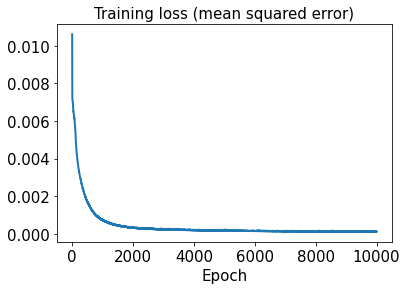

In [31]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

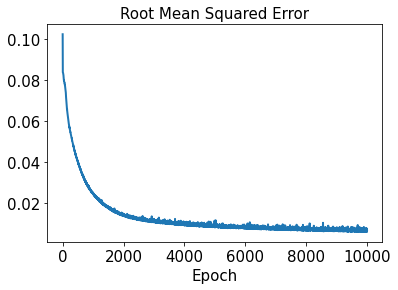

In [32]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
test_results = sd.evaluate(tsr_theta_train)

29/29 [==============================] - 0s 1ms/step - loss: 6.3755e-05 - rmse: 0.0000e+00


In [34]:
decoded_train = sd.predict(tsr_theta_train)

In [35]:
decoded_test = sd.predict(tsr_theta_test)

In [36]:
error_train_abs = np.abs(decoded_train - y_train)

In [37]:
error_test_abs = np.abs(decoded_test - y_test)

In [38]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0035262576


In [39]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.007289883


In [40]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0032623, 0.0031032087, 0.0020269405, 0.004023862, 0.0030741876, 0.0046360097, 0.004545306, 0.0045689857, 0.0034172416, 0.004543816, 0.0032266201, 0.0044050403, 0.004512019, 0.0031105995, 0.0049998914, 0.0033815494, 0.0022530796, 0.0027013116, 0.0044726715, 0.0052212426, 0.0038021868, 0.0037796518, 0.0047004595, 0.0025469132, 0.0021883138, 0.0037677912, 0.0047616055, 0.0036930337, 0.0024241747, 0.0027337337, 0.0030146632, 0.006500941, 0.0035818322, 0.0036733132, 0.001527771, 0.002167467, 0.003461857, 0.004762033, 0.0021428757, 0.0017856312, 0.0037629534, 0.0034957104, 0.0043070405, 0.003122429, 0.0042715096, 0.0028837512, 0.0020892094, 0.0021013315, 0.0031905447, 0.004012863, 0.0027358667, 0.0026995302, 0.0027197266, 0.0015357765, 0.0023093487, 0.0020146763, 0.0032206909, 0.0031958804, 0.0062894393, 0.0037453433, 0.0054890974, 0.0059659127, 0.0053902604, 0.0035848215, 0.0025855063, 0.0040430655, 0.0043716254, 0.0017460412, 0.0035146251, 0.004030451, 0.0025480108, 0.0018214164, 0.0028

In [41]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0038920797, 0.017082363, 0.0040986286, 0.008727667, 0.0035605303, 0.0045541036, 0.004881034, 0.036662582, 0.0027547842, 0.004655792, 0.009233303, 0.0157969, 0.0054614814, 0.007762507, 0.0033694576, 0.00910281, 0.0046878136, 0.009609956, 0.0032472007, 0.0051287212, 0.0043342574, 0.008284468, 0.004740479, 0.0069113905, 0.002828581, 0.0053239707, 0.0038157983, 0.0031640164, 0.014436609, 0.00634223, 0.007645448, 0.0042742575, 0.006368113, 0.008103765, 0.017134644, 0.0062635425, 0.0045352415, 0.0052074767, 0.0067393733, 0.005897862, 0.004878572, 0.0053551635, 0.0089652045, 0.002444876, 0.004320804, 0.006704922, 0.008013265, 0.011383056, 0.0024550103, 0.0027691189, 0.0032048977, 0.011593415, 0.005411715, 0.003949837, 0.006215699, 0.01217369, 0.0038353892, 0.003270225, 0.006917385, 0.004407043, 0.002333553, 0.006371845, 0.006121099, 0.005286222, 0.0053986413, 0.0054164897, 0.0042335466, 0.002903232, 0.0042890636, 0.003989818, 0.0033574465, 0.0027249288, 0.0050120037, 0.002970567, 0.0042600

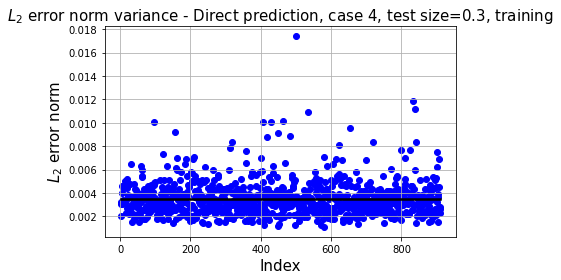

In [42]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 4, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

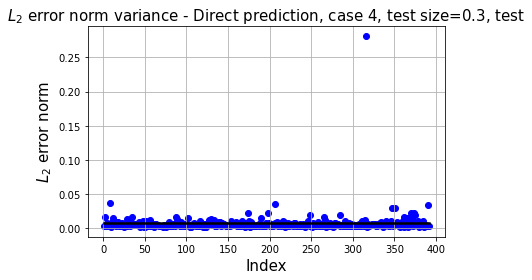

In [43]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 4, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

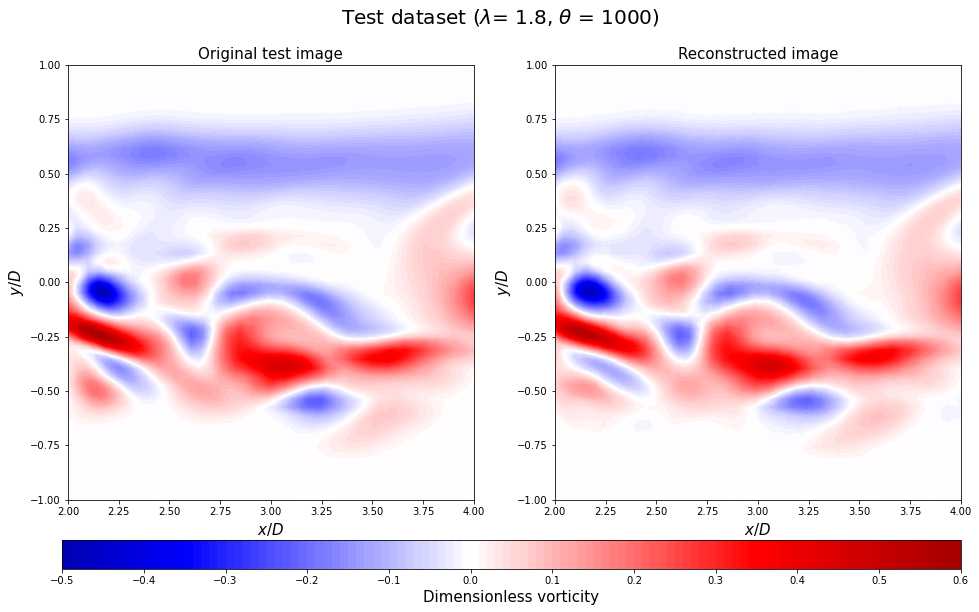

In [44]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

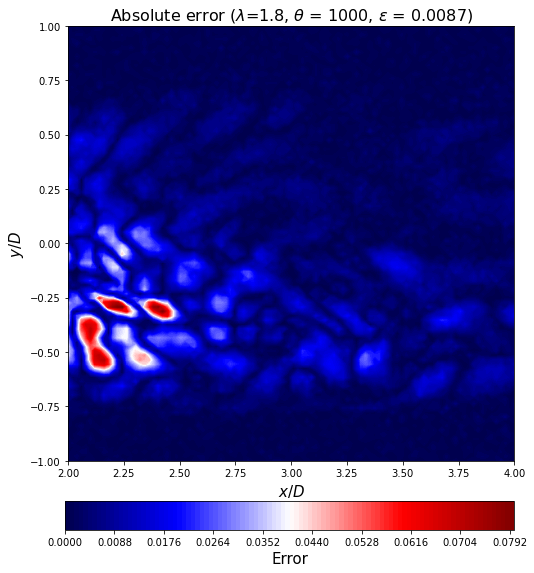

In [45]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()